In [31]:
import numpy as np
import math
import os
from matplotlib import pyplot as plt

DISTANCE = 3

In [46]:
def lin_mapping(vector, max_val = 250):
    distance_scaled = np.interp(vector, [0, max_val], [0, 255]).astype(np.uint8)
    return distance_scaled

def log_mapping(vector, max_val = 250):
    log1p = lambda x: 255 * math.log(x + 1) / math.log(max_val + 1)
    distance_scaled = np.vectorize(log1p)(vector).astype(np.uint8)
    return distance_scaled

distances = []

for img in os.listdir('clear_day/lidar_2d'):
    img_path = os.path.join('clear_day/lidar_2d', img)
    img_array = np.load(img_path)[DISTANCE]
    img_array = img_array[img_array > 0]
    img_array = log_mapping(img_array)
    distances.extend(img_array)

distances = np.array(distances)
distances = distances / 255

In [47]:
np.mean(distances)

0.5867350322882331

In [48]:
np.std(distances)

0.17149311254910074

(array([3.000e+00, 4.900e+01, 5.400e+01, 3.500e+01, 8.800e+01, 1.280e+02,
        1.970e+02, 2.160e+02, 1.880e+02, 1.110e+02, 2.050e+02, 2.470e+03,
        2.730e+03, 5.695e+03, 3.340e+03, 3.099e+03, 3.434e+03, 3.527e+03,
        3.056e+03, 3.386e+03, 3.257e+03, 3.426e+03, 3.244e+03, 6.720e+02,
        3.254e+03, 3.459e+03, 1.152e+03, 2.361e+03, 6.230e+02, 3.214e+03,
        2.896e+03, 6.740e+02, 3.084e+03, 8.330e+02, 2.655e+03, 1.202e+03,
        3.210e+02, 2.711e+03, 8.640e+02, 1.062e+03, 2.714e+03, 8.950e+02,
        1.319e+03, 2.407e+03, 1.080e+03, 8.020e+02, 2.038e+03, 2.948e+03,
        1.607e+03, 1.421e+03, 2.166e+03, 1.522e+03, 2.474e+03, 1.382e+03,
        7.910e+02, 1.736e+03, 3.017e+03, 3.188e+03, 2.175e+03, 2.006e+03,
        1.813e+03, 2.303e+03, 3.033e+03, 1.729e+03, 3.808e+03, 3.632e+03,
        3.252e+03, 2.463e+03, 2.022e+03, 1.945e+03, 1.967e+03, 1.735e+03,
        8.530e+02, 1.385e+03, 1.174e+03, 1.314e+03, 1.151e+03, 1.313e+03,
        1.162e+03, 1.216e+03, 7.700e+0

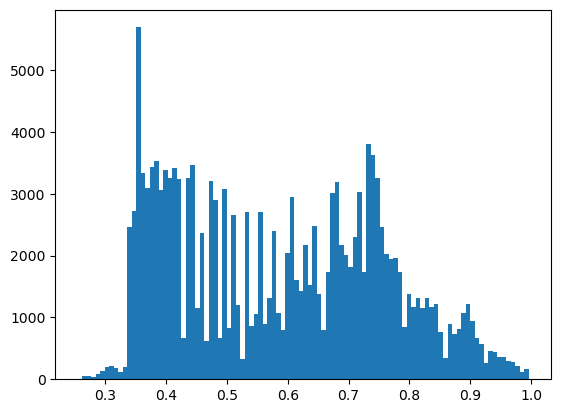

In [49]:
plt.hist(distances, bins=100)